In [ ]:
import torch
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [ ]:
# def generate_real():
#   real_data = torch.FloatTensor([1,0,1,0])
#   return real_data

In [ ]:
ㅡ

In [ ]:
# 판별기 만들기

class Discriminator(nn.Module):
  def __init__(self):
    # 파이토치 부모 클래스 초기화
    super().__init__()

    # 신경망 레이어 정의
    self.model = nn.Sequential(
        nn.Linear(4,3),
        nn.Sigmoid(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )

    # 손실함수 설정
    self.loss_function = nn.MSELoss()

    # SGD 옵티마이저 설정
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    # 진행 측정을 위한 변수 초기화
    self.counter = 0;
    self.progress = []

    pass


  def forward(self, inputs):
    # 모델 실행
    return self.model(inputs)

  def train(self, inputs, targets):
    # 신경망 출력 계산
    outputs = self.forward(inputs)

    # 손실 계산
    loss = self.loss_function(outputs, targets)

    # 카운터를 증가시키고 10회마다 오차 저장
    self.counter += 1
    if(self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass
    if(self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass

    # 기울기를 초기화하고 역전파 후 가중치 갱신
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass
    
  def plot_progress(self):
    df = pd.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim = (0, 1.0), figsize = (16,8), alpha = 0.1, marker = '.', grid = True, yticks = (0,0.25,0.5))
    pass

In [ ]:
# 판별기 테스트하기

def generate_random(size):
  random_data = torch.rand(size)
  return random_data

In [ ]:
D = Discriminator()

for i in range(10000):
  # 실제 데이터
  D.train(generate_real(), torch.FloatTensor([1.0]))
  # 생성된 데이터
  D.train(generate_random(4), torch.FloatTensor([0.0]))
  pass

counter =  10000
counter =  20000


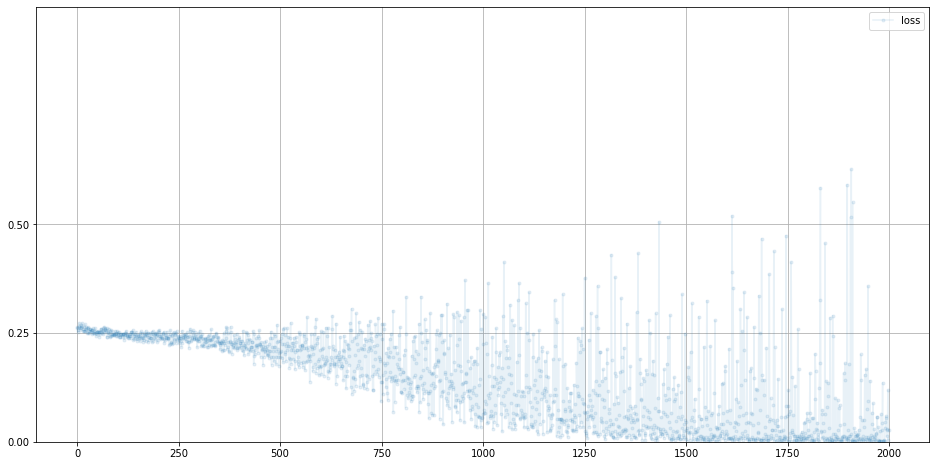

In [ ]:
D.plot_progress()

In [ ]:
print(D.forward(generate_real()).item())
print(D.forward(generate_random(4)).item())

0.8366870880126953
0.03306076303124428


생성기 만들기


In [ ]:
class Generator(nn.Module):
  def __init__(self):
    # 파이토치 부모 클래스 초기화
    super().__init__()

    # 신경망 레이어 정의
    self.model = nn.Sequential(
        nn.Linear(1,3),
        nn.Sigmoid(),
        nn.Linear(3,4),
        nn.Sigmoid()
    )

    # SGD 옵티마이저 설정
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    # 진행 측정을 위한 변수 초기화
    self.counter = 0;
    self.progress = []

    pass


  def forward(self, inputs):
    # 모델 실행
    return self.model(inputs)

  def train(self, D, inputs, targets):
    # 신경망 출력 계산
    g_output = self.forward(inputs)

    # 판별기로 전달
    d_output = D.forward(g_output)

    # 오차 계산
    loss = D.loss_function(d_output, targets)

    # 카운터를 증가시키고 10회마다 오차 저장
    self.counter += 1;
    if(self.counter%10 == 0):
      self.progress.append(loss.item())
      pass

    # 기울기를 초기화하고 역전파 후 가중치 갱신
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass
    
  def plot_progress(self):
    df = pd.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim = (0, 1.0), figsize = (16,8), alpha = 0.1, marker = '.', grid = True, yticks = (0,0.25,0.5))
    pass

생성기 결과 확인하기

In [ ]:
# check the generator output is of the right type and shape

G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.6052, 0.4784, 0.5251, 0.5381], grad_fn=<SigmoidBackward0>)

**3단계에 걸쳐 GAN을 훈련시키자!**

In [ ]:
%%time

# 판별기 및 생성기 생성

D = Discriminator()
G = Generator()

# 판별기와 생성기 훈련

for i in range(10000):
  # 1단계 : 참에 대해 판별기 훈련
  D.train(generate_real(), torch.FloatTensor([1.0]))

  # 2단계 : 거짓에 대해 판별기 훈련
  # G의 기울기가 계산되지 않도록 detach() 함수를 이용
  D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))

  # 3단계 : 생성기 훈련
  G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))

  pass

counter =  10000
counter =  20000
CPU times: user 13.4 s, sys: 33.5 ms, total: 13.4 s
Wall time: 13.4 s


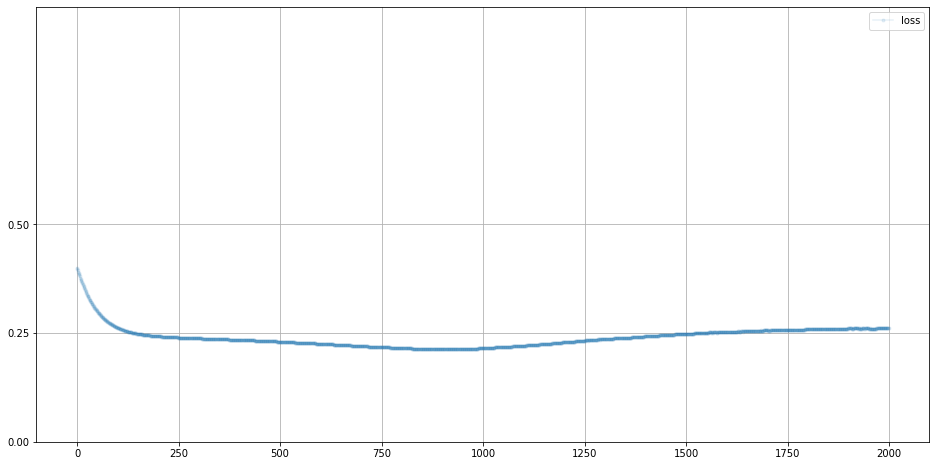

In [ ]:
# plot Discriminator error

D.plot_progress()

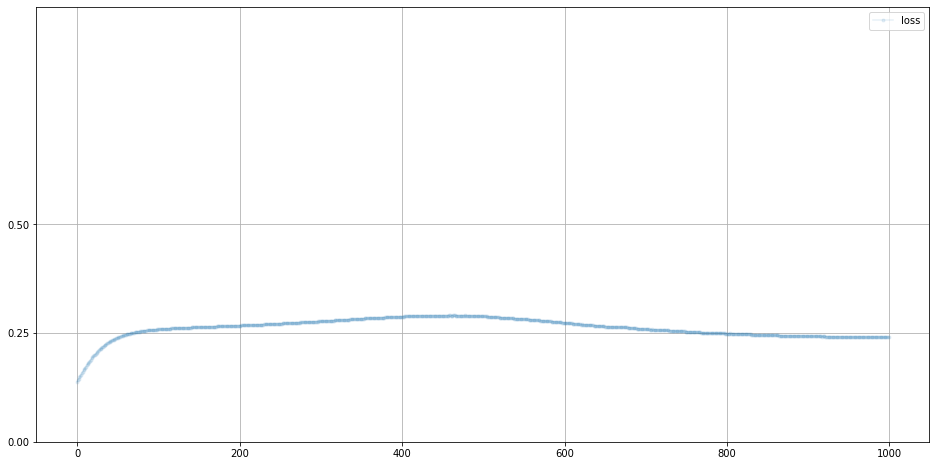

In [ ]:
# plot Generator error

G.plot_progress()

In [ ]:
# manually run generator to see it's outputs

G.forward(torch.FloatTensor([0.5]))

tensor([0.9280, 0.0568, 0.9327, 0.0585], grad_fn=<SigmoidBackward0>)

In [ ]:
timage_list = []

# 매 1000회 이미지를 저장
if(i%1000 == 0):
  image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())

# plot images collected during training
plt.figure(figsize=(16,8))
plt.imshow(numpy.array(image_list).T, interpolation = 'none', cmap = 'Blues')

NameError: ignored

<Figure size 1152x576 with 0 Axes>